## Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier

## Load dataset and perform basic EDA


In [2]:
#Read CSV file into a dataframe
df = pd.read_csv("/content/Skyserver_12_30_2019 4_49_58 PM.csv")

#Copy dataframe to a new variable to avoid any accidental changes in the original data
df_new = df.copy()

#Display the dataframe
display(df_new)

objid          ra        dec         u         g  \
0      1237666301628060000   47.372545   0.820621  18.69254  17.13867   
1      1237673706652430000  116.303083  42.455980  18.47633  17.30546   
2      1237671126974140000  172.756623  -8.785698  16.47714  15.31072   
3      1237665441518260000  201.224207  28.771290  18.63561  16.88346   
4      1237665441522840000  212.817222  26.625225  18.88325  17.87948   
...                    ...         ...        ...       ...       ...   
99995  1237667968033620000  228.674917  19.179460  19.32631  18.82748   
99996  1237664818210470000  173.757382  36.441603  18.33687  17.30365   
99997  1237664295297290000  205.426531  38.499053  17.50690  15.63152   
99998  1237656537513130000  337.135144  -9.635967  19.33946  17.21436   
99999  1237670459113730000   37.440188  25.400888  18.11769  16.86279   

              r         i         z   run  rerun  camcol  field  \
0      16.55555  16.34662  16.17639  4849    301       5    771   
1      17.24116  17.32780  17.37114  6573    301       6    220   
2      15.55971  15.72207  15.82471  5973    301       1     13   
3      16.09825  15.70987  15.43491  4649    301       3    121   
4      17.47037  17.17441  17.05235  4649    301       3    191   
...         ...       ...       ...   ...    ...     ...    ...   
99995  18.65659  18.60481  18.60917  5237    301       5    134   
99996  17.16037  17.14895  17.14419  4504    301       2    111   
99997  15.22328  15.04469  15.28668  4382    301       4     97   
99998  16.29697  15.86745  15.51556  2576    301       2    105   
99999  16.31057  16.07582  15.94701  5817    301       5    120   

                 specobjid   class  redshift  plate    mjd  fiberid  
0      8168632633242440000    STAR  0.000115   7255  56597      832  
1      9333948945297330000    STAR -0.000093   8290  57364      868  
2      3221211255238850000    STAR  0.000165   2861  54583       42  
3      2254061292459420000  GALAXY  0.058155   2002  53471       35  
4      2390305906828010000  GALAXY  0.072210   2123  53793       74  
...                    ...     ...       ...    ...    ...      ...  
99995  4448615345201370000     QSO  0.438182   3951  55681      672  
99996  2265404129658560000    STAR -0.000497   2012  53493      340  
99997  2257446413900210000  GALAXY  0.004587   2005  53472       62  
99998   811847537492257000  GALAXY  0.084538    721  52228      268  
99999  2678586035360790000    STAR -0.000085   2379  53762      255  

[100000 rows x 18 columns]

In [3]:
#Print the type of the dataset
type(df_new)

pandas.core.frame.DataFrame

In [4]:
#Display the number of rows and columns in the dataframe
df_new.shape

(100000, 18)

In [5]:
#Display the columns in the dataset
df_new.keys()

Index(['objid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'rerun', 'camcol',
       'field', 'specobjid', 'class', 'redshift', 'plate', 'mjd', 'fiberid'],
      dtype='object')

In [6]:
#Display information about the dataframe
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   objid      100000 non-null  int64  
 1   ra         100000 non-null  float64
 2   dec        100000 non-null  float64
 3   u          100000 non-null  float64
 4   g          100000 non-null  float64
 5   r          100000 non-null  float64
 6   i          100000 non-null  float64
 7   z          100000 non-null  float64
 8   run        100000 non-null  int64  
 9   rerun      100000 non-null  int64  
 10  camcol     100000 non-null  int64  
 11  field      100000 non-null  int64  
 12  specobjid  100000 non-null  uint64 
 13  class      100000 non-null  object 
 14  redshift   100000 non-null  float64
 15  plate      100000 non-null  int64  
 16  mjd        100000 non-null  int64  
 17  fiberid    100000 non-null  int64  
dtypes: float64(8), int64(8), object(1), uint64(1)
memory usage: 13.7+

In [7]:
#Displays output of describe function and converting values that are displayed from scientific notation to normal numeric values
df_new.describe().apply(lambda s: s.apply('{0:.5f}'.format))

objid            ra           dec             u  \
count               100000.00000  100000.00000  100000.00000  100000.00000   
mean   1237662562871840256.00000     177.51289      25.05206      18.63791   
std          7264930969192.39160      78.03907      20.56726       0.83228   
min    1237645941824359936.00000       0.01306     -19.49546      10.61181   
25%    1237657612877430016.00000     136.35653       6.77038      18.21290   
50%    1237662226223075072.00000     180.41169      23.91861      18.87325   
75%    1237667210516609792.00000     224.36911      40.34454      19.27330   
max    1237680530819379968.00000     359.99962      84.49049      19.59995   

                  g             r             i             z           run  \
count  100000.00000  100000.00000  100000.00000  100000.00000  100000.00000   
mean       17.40713      16.88168      16.62553      16.46709    3978.72764   
std         0.98592       1.13334       1.20953       1.28179    1691.49860   
min         9.66834       9.00517       8.84840       8.94779     109.00000   
25%        16.85298      16.19661      15.86528      15.61996    2826.00000   
50%        17.51586      16.89064      16.59989      16.42838    3900.00000   
75%        18.05606      17.58575      17.34491      17.23463    5061.00000   
max        19.99605      31.99010      32.14147      29.38374    8162.00000   

              rerun        camcol         field                   specobjid  \
count  100000.00000  100000.00000  100000.00000                100000.00000   
mean      301.00000       3.27401     187.24308   2913905239695828480.00000   
std         0.00000       1.62121     141.03730   2488871561923097088.00000   
min       301.00000       1.00000      11.00000    299489677444934016.00000   
25%       301.00000       2.00000      85.00000   1335425704522702592.00000   
50%       301.00000       3.00000     153.00000   2354329743123310080.00000   
75%       301.00000       5.00000     249.00000   3276384474631267328.00000   
max       301.00000       6.00000     982.00000  13176452382555699200.00000   

           redshift         plate           mjd       fiberid  
count  100000.00000  100000.00000  100000.00000  100000.00000  
mean        0.17062    2587.98427   53913.90869     341.69908  
std         0.43757    2210.54739    1547.24449     217.06861  
min        -0.00414     266.00000   51608.00000       1.00000  
25%         0.00000    1186.00000   52733.00000     160.00000  
50%         0.04600    2091.00000   53726.00000     328.00000  
75%         0.09543    2910.00000   54585.00000     502.00000  
max         7.01124   11703.00000   58543.00000    1000.00000

In [8]:
#Check if any variable contains missing values
#It will return TRUE beside the column that contains missing values
df_new.isnull().any(axis=0)

objid        False
ra           False
dec          False
u            False
g            False
r            False
i            False
z            False
run          False
rerun        False
camcol       False
field        False
specobjid    False
class        False
redshift     False
plate        False
mjd          False
fiberid      False
dtype: bool

In [9]:
#Check if there are any duplicated rows
df_new.duplicated().sum()

0

In [10]:
#Prepare new dataset by dropping ['objid', 'run', 'rerun', 'camcol', 'plate', 'field', 'mjd', 'fiberid', 'specobjid', 'redshift'] attributes

df_new = df_new.drop(columns=['objid', 'run', 'rerun', 'camcol', 'plate', 'field', 'mjd', 'fiberid', 'specobjid', 'redshift'])
display(df_new)

ra        dec         u         g         r         i  \
0       47.372545   0.820621  18.69254  17.13867  16.55555  16.34662   
1      116.303083  42.455980  18.47633  17.30546  17.24116  17.32780   
2      172.756623  -8.785698  16.47714  15.31072  15.55971  15.72207   
3      201.224207  28.771290  18.63561  16.88346  16.09825  15.70987   
4      212.817222  26.625225  18.88325  17.87948  17.47037  17.17441   
...           ...        ...       ...       ...       ...       ...   
99995  228.674917  19.179460  19.32631  18.82748  18.65659  18.60481   
99996  173.757382  36.441603  18.33687  17.30365  17.16037  17.14895   
99997  205.426531  38.499053  17.50690  15.63152  15.22328  15.04469   
99998  337.135144  -9.635967  19.33946  17.21436  16.29697  15.86745   
99999   37.440188  25.400888  18.11769  16.86279  16.31057  16.07582   

              z   class  
0      16.17639    STAR  
1      17.37114    STAR  
2      15.82471    STAR  
3      15.43491  GALAXY  
4      17.05235  GALAXY  
...         ...     ...  
99995  18.60917     QSO  
99996  17.14419    STAR  
99997  15.28668  GALAXY  
99998  15.51556  GALAXY  
99999  15.94701    STAR  

[100000 rows x 8 columns]

The variables above are used to determine if the object is a GALAXY, STAR or QSO (quasar)

In [11]:
#Performing one-hot encoding

#Retaining the names of the class
df_new_class_values = list(df_new['class'].unique())
print(df_new_class_values)

#Converting type of columns to category
df_new['class'] = df_new['class'].astype('category')

#Assigning numerical values to the df_new classes and replacing the non-numerical values
df_new['class'] = df_new['class'].cat.codes

print(df_new)

['STAR', 'GALAXY', 'QSO']
               ra        dec         u         g         r         i  \
0       47.372545   0.820621  18.69254  17.13867  16.55555  16.34662   
1      116.303083  42.455980  18.47633  17.30546  17.24116  17.32780   
2      172.756623  -8.785698  16.47714  15.31072  15.55971  15.72207   
3      201.224207  28.771290  18.63561  16.88346  16.09825  15.70987   
4      212.817222  26.625225  18.88325  17.87948  17.47037  17.17441   
...           ...        ...       ...       ...       ...       ...   
99995  228.674917  19.179460  19.32631  18.82748  18.65659  18.60481   
99996  173.757382  36.441603  18.33687  17.30365  17.16037  17.14895   
99997  205.426531  38.499053  17.50690  15.63152  15.22328  15.04469   
99998  337.135144  -9.635967  19.33946  17.21436  16.29697  15.86745   
99999   37.440188  25.400888  18.11769  16.86279  16.31057  16.07582   

              z  class  
0      16.17639      2  
1      17.37114      2  
2      15.82471      2  
3      15

## Perform train-test split and plot EDA plots

In [12]:
#Get independent variables for dataset X
x = df_new[['ra','dec','u','g','r','i','z']]

#Get target variable for dataset Y
y = df_new[['class']]

display(x.head())
display(y.head())

ra        dec         u         g         r         i         z
0   47.372545   0.820621  18.69254  17.13867  16.55555  16.34662  16.17639
1  116.303083  42.455980  18.47633  17.30546  17.24116  17.32780  17.37114
2  172.756623  -8.785698  16.47714  15.31072  15.55971  15.72207  15.82471
3  201.224207  28.771290  18.63561  16.88346  16.09825  15.70987  15.43491
4  212.817222  26.625225  18.88325  17.87948  17.47037  17.17441  17.05235

class
0      2
1      2
2      2
3      0
4      0

In [13]:
#perform train test split.
from sklearn.model_selection import train_test_split
X_1,X_test,y_1,y_test=train_test_split(x,y,test_size=0.2) #20% for testing
X_train,X_val,y_train,y_val=train_test_split(X_1,y_1,test_size=0.2) #64% for train, 16% for val, 20% test

#doublecheck dimensions of training and testing data
print("X_train: ",X_train.shape)
print("X_test: ",X_test.shape)
print("Y_train: ",y_train.shape)
print("Y_test: ",y_test.shape)

X_train:  (64000, 7)
X_test:  (20000, 7)
Y_train:  (64000, 1)
Y_test:  (20000, 1)


In [14]:
X_train.head()

ra        dec         u         g         r         i         z
71427  226.836353   8.728848  18.03668  16.14101  15.21940  14.76850  14.44221
92183  188.052295  42.366235  19.56497  18.57022  18.23875  18.09096  18.01965
89557  164.237839  45.882288  19.34621  17.80652  16.96234  16.57840  16.26943
99182  181.585071  -3.282167  18.70341  17.73843  18.00447  18.22399  18.36795
62618  222.124575  -2.402734  19.53053  18.31054  17.81818  17.52233  17.32463

In [15]:
X_test.head()

ra        dec         u         g         r         i         z
91714  153.472135  39.271965  19.56276  19.51721  19.40172  19.46292  19.41533
63432  144.692569  13.725697  17.48190  16.55162  16.18153  16.03943  15.98464
24508    1.771466   6.425982  15.85469  16.00588  16.40968  16.73124  17.02450
7383   209.460985   5.171301  19.08472  16.98034  15.85333  15.38496  15.04872
25957  221.068871  55.691926  18.76782  17.71350  17.25225  16.91495  16.80400

In [16]:
y_train.head()

class
71427      0
92183      2
89557      0
99182      2
62618      0

In [17]:
y_test.head()

class
91714      1
63432      2
24508      2
7383       0
25957      0

In [18]:
xa = X_train
xa['class'] = y_train
xa.head()

ra        dec         u         g         r         i  \
71427  226.836353   8.728848  18.03668  16.14101  15.21940  14.76850   
92183  188.052295  42.366235  19.56497  18.57022  18.23875  18.09096   
89557  164.237839  45.882288  19.34621  17.80652  16.96234  16.57840   
99182  181.585071  -3.282167  18.70341  17.73843  18.00447  18.22399   
62618  222.124575  -2.402734  19.53053  18.31054  17.81818  17.52233   

              z  class  
71427  14.44221      0  
92183  18.01965      2  
89557  16.26943      0  
99182  18.36795      2  
62618  17.32463      0

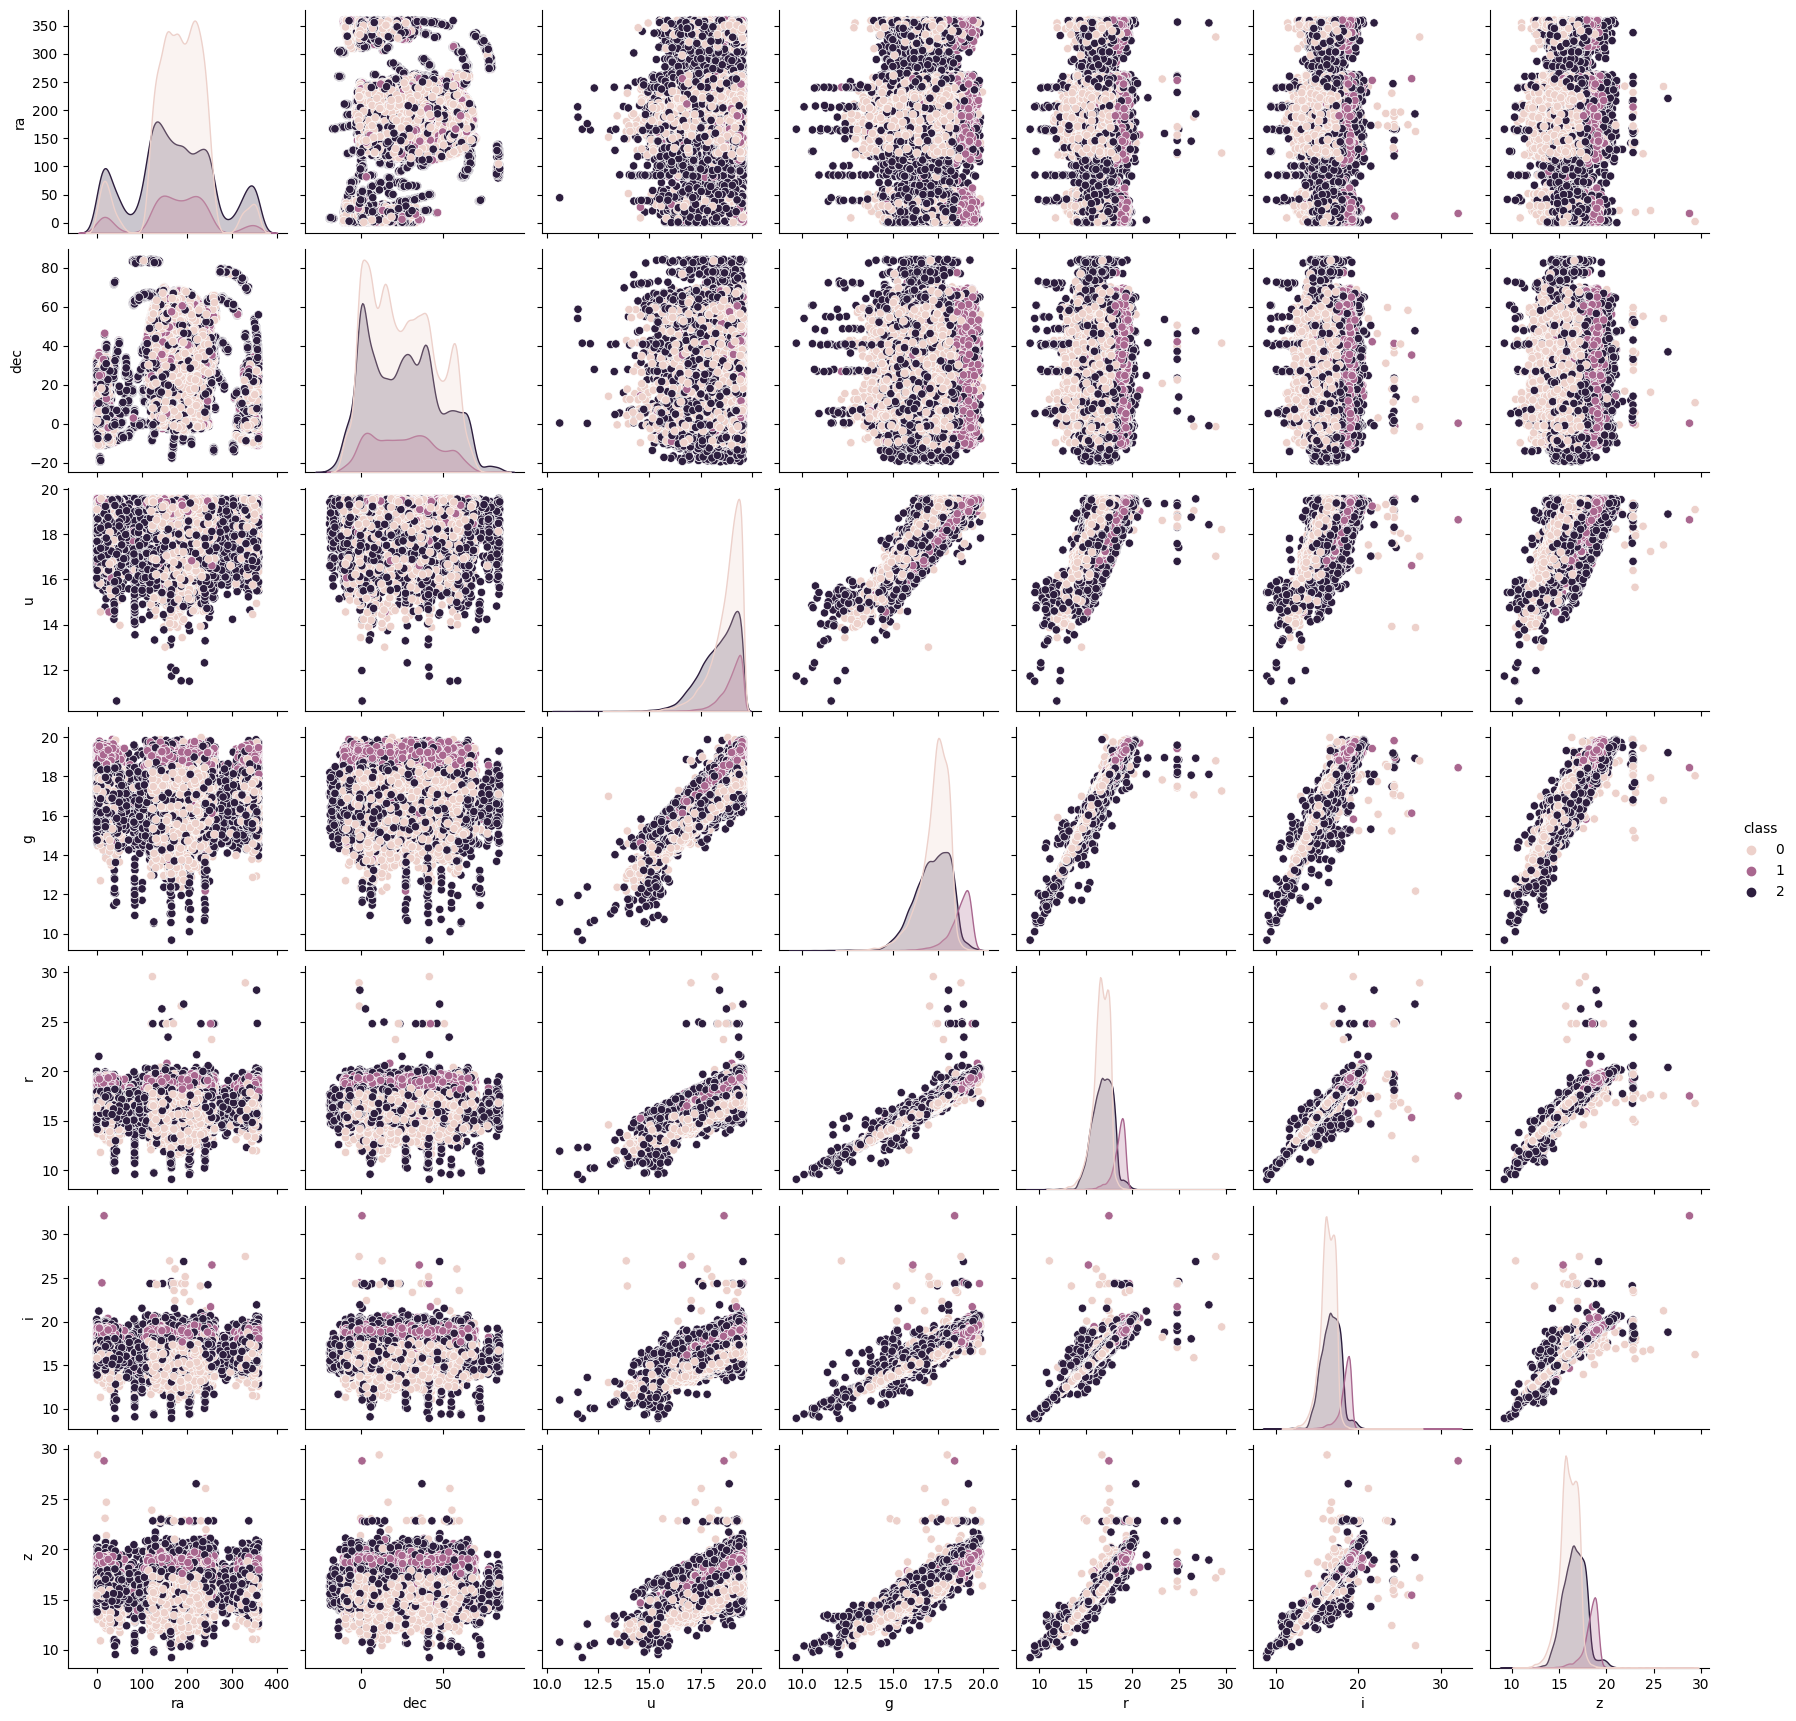

In [19]:
sns.pairplot(xa, hue='class')

In [20]:
corr = xa.corr()
corr.style.background_gradient(cmap='coolwarm')

In [21]:
X_train = X_train.drop(['class'], axis=1)
X_train.head()

ra        dec         u         g         r         i         z
71427  226.836353   8.728848  18.03668  16.14101  15.21940  14.76850  14.44221
92183  188.052295  42.366235  19.56497  18.57022  18.23875  18.09096  18.01965
89557  164.237839  45.882288  19.34621  17.80652  16.96234  16.57840  16.26943
99182  181.585071  -3.282167  18.70341  17.73843  18.00447  18.22399  18.36795
62618  222.124575  -2.402734  19.53053  18.31054  17.81818  17.52233  17.32463

## Construct Naïve Bayes algorithm
This is to set a benchmark for the random forest algorithm and the goal is for the random forest algorithm to have a better performance than the Naïve Bayes algorithm

In [22]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [23]:
#Without Scaling

ws = GaussianNB()
ws.fit(X_train,y_train)
Y_pred = ws.predict(X_test)

print(f'Accuracy Score: {(accuracy_score(Y_pred, y_test)*100)}')

Accuracy Score: 62.49


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [24]:
#Classification Report for Naïve Bayes without scaling
predict_yCR = ws.predict(X_test)
cr = classification_report(y_test,predict_yCR)
print(cr)

              precision    recall  f1-score   support

           0       0.68      0.84      0.75     10237
           1       0.44      0.85      0.58      2093
           2       0.63      0.28      0.38      7670

    accuracy                           0.62     20000
   macro avg       0.58      0.66      0.57     20000
weighted avg       0.64      0.62      0.59     20000



In [25]:
#Confusion Matrix for Naïve Bayes without scaling
cmws = confusion_matrix(y_test,predict_yCR)
print(cmws)

[[8589  580 1068]
 [ 132 1785  176]
 [3819 1727 2124]]


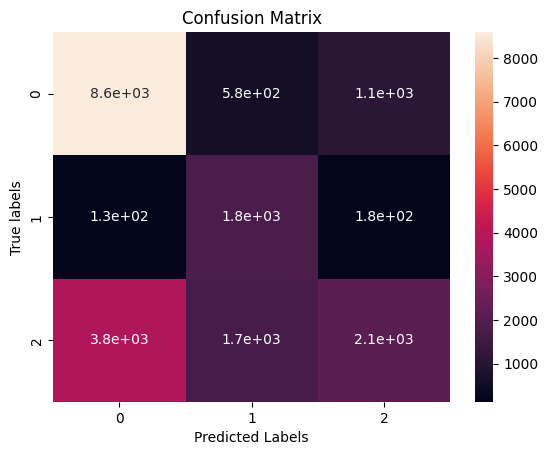

In [26]:
ax= plt.subplot()

sns.heatmap(cmws, annot=True, ax=ax);

ax.set_xlabel('Predicted Labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');

ax.xaxis.set_ticklabels(["0","1","2"]); ax.yaxis.set_ticklabels(["0","1","2"]);

In [27]:
#With StandardScaling

scalerStandard = StandardScaler()
X_train_scalerStandard = scalerStandard.fit_transform(X_train)
X_test_scalerStandard = scalerStandard.transform(X_test)

wss = GaussianNB()
wss.fit(X_train_scalerStandard, y_train)
predict_ySS = wss.predict(X_test_scalerStandard)

print(f'Accuracy Score: {(accuracy_score(predict_ySS, y_test)*100)}')

Accuracy Score: 62.49


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [28]:
#Classification Report for Naïve Bayes With StandardScaling
predict_yCRSS = wss.predict(X_test_scalerStandard)
cr = classification_report(y_test,predict_yCRSS)
print(cr)

              precision    recall  f1-score   support

           0       0.68      0.84      0.75     10237
           1       0.44      0.85      0.58      2093
           2       0.63      0.28      0.38      7670

    accuracy                           0.62     20000
   macro avg       0.58      0.66      0.57     20000
weighted avg       0.64      0.62      0.59     20000



In [29]:
#Confusion Matrix for Naïve Bayes With StandardScaling
cmss = confusion_matrix(y_test,predict_yCRSS)
print(cmss)

[[8589  580 1068]
 [ 132 1785  176]
 [3819 1727 2124]]


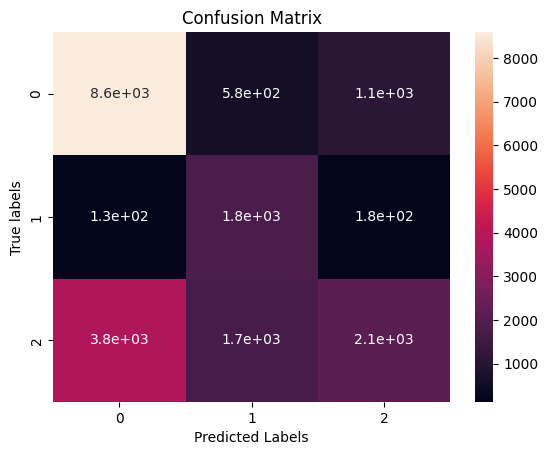

In [30]:
ax= plt.subplot()

sns.heatmap(cmss, annot=True, ax=ax);

ax.set_xlabel('Predicted Labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');

ax.xaxis.set_ticklabels(["0","1","2"]); ax.yaxis.set_ticklabels(["0","1","2"]);

In [31]:
#With MinMaxScaling

scalerMinMax = MinMaxScaler()
X_train_scalerMinMax = scalerMinMax.fit_transform(X_train)
X_test_scalerMinMax = scalerMinMax.transform(X_test)

wmm = GaussianNB()
wmm.fit(X_train_scalerMinMax, y_train)
predict_yMM = wmm.predict(X_test_scalerMinMax)

print(f'Accuracy Score: {(accuracy_score(predict_yMM, y_test)*100)}')

Accuracy Score: 62.49


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [32]:
#Classification Report for Naïve Bayes With MinMaxScaling
predict_yCRMM = wmm.predict(X_test_scalerMinMax)
cr = classification_report(y_test,predict_yCRMM)
print(cr)

              precision    recall  f1-score   support

           0       0.68      0.84      0.75     10237
           1       0.44      0.85      0.58      2093
           2       0.63      0.28      0.38      7670

    accuracy                           0.62     20000
   macro avg       0.58      0.66      0.57     20000
weighted avg       0.64      0.62      0.59     20000



In [33]:
#Confusion Matrix for Naïve Bayes With MinMaxScaling
cmmm = confusion_matrix(y_test,predict_yCRMM)
print(cmmm)

[[8589  580 1068]
 [ 132 1785  176]
 [3819 1727 2124]]


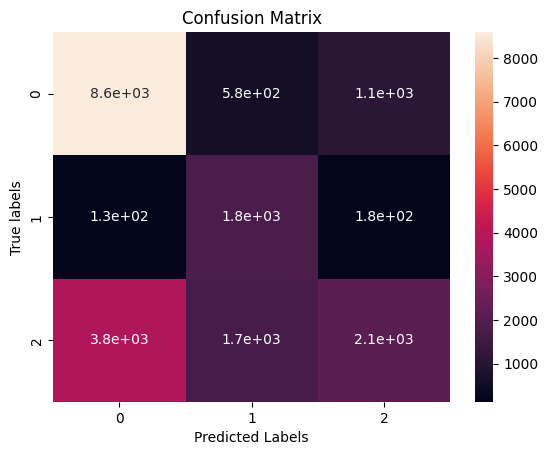

In [34]:
ax= plt.subplot()

sns.heatmap(cmmm, annot=True, ax=ax);

ax.set_xlabel('Predicted Labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');

ax.xaxis.set_ticklabels(["0","1","2"]); ax.yaxis.set_ticklabels(["0","1","2"]);

## Construct Random Forest Algorithm

In [35]:
val_score =[]
train_score = []
trees = [2,5,10,15,20]+list(range(30,110,10))+[200, 300, 400]
display(trees)

[2, 5, 10, 15, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200, 300, 400]

<ipython-input-36-4445f7424e5d>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF.fit(X_train,y_train)
<ipython-input-36-4445f7424e5d>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF.fit(X_train,y_train)
<ipython-input-36-4445f7424e5d>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF.fit(X_train,y_train)
<ipython-input-36-4445f7424e5d>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF.fit(X_train,y_train)
<ipython-input-36-4445f7424e5d>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

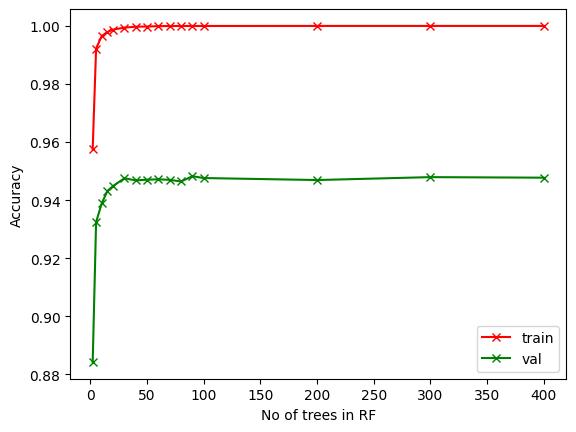

In [36]:
for n in trees:
  RF= RandomForestClassifier(n_estimators=n)
  RF.fit(X_train,y_train)
  train_score.append(RF.score(X_train, y_train))
  val_score.append(RF.score(X_val, y_val))

plt.plot(trees, train_score,'r-x',label='train')
plt.plot(trees, val_score,'g-x', label='val')
plt.xlabel("No of trees in RF")
plt.ylabel("Accuracy")
plt.legend()

In [37]:
#optimal depth and number of trees in the random forest
ind = val_score.index(max(val_score))
opt_trees = trees[ind]
print (opt_trees)

90


In [38]:
RF= RandomForestClassifier(n_estimators=opt_trees)
RF.fit(X_train,y_train)
y_pred = RF.predict(X_test)
print("score :",RF.score(X_test,y_test))
print(classification_report(y_test, y_pred, target_names=['0', '1', '2'])) #Classification report

<ipython-input-38-f91d7ad89a4c>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF.fit(X_train,y_train)


score : 0.9507
              precision    recall  f1-score   support

           0       0.97      0.95      0.96     10237
           1       0.93      0.91      0.92      2093
           2       0.94      0.96      0.95      7670

    accuracy                           0.95     20000
   macro avg       0.94      0.94      0.94     20000
weighted avg       0.95      0.95      0.95     20000



In [39]:
#Confusion Matrix
cmRF = confusion_matrix(y_test, y_pred)
print(cmRF)

[[9736   74  427]
 [ 128 1901   64]
 [ 216   77 7377]]


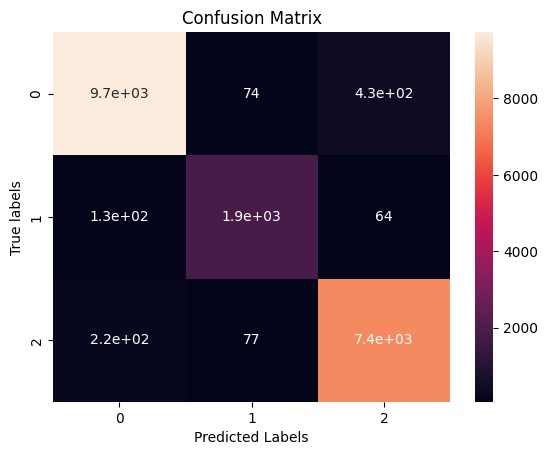

In [40]:
ax= plt.subplot()

sns.heatmap(cmRF, annot=True, ax=ax);

ax.set_xlabel('Predicted Labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');

ax.xaxis.set_ticklabels(["0","1","2"]); ax.yaxis.set_ticklabels(["0","1","2"]);

In [41]:
#un-optimized classifier (it has by default 100 trees and each tree grows to the maximum)
tree= DecisionTreeClassifier() #number of trees is 100
tree.fit(X_train,y_train)
y_pred1 = tree.predict(X_test)
print("score :",tree.score(X_test,y_test))
print(classification_report(y_test, y_pred1, target_names=['0', '1', '2']))

score : 0.91815
              precision    recall  f1-score   support

           0       0.93      0.93      0.93     10237
           1       0.88      0.89      0.88      2093
           2       0.91      0.91      0.91      7670

    accuracy                           0.92     20000
   macro avg       0.91      0.91      0.91     20000
weighted avg       0.92      0.92      0.92     20000



In [42]:
tree.get_depth()

29

[Text(0.5517001371694555, 0.9852941176470589, 'z <= 17.485\ngini = 0.582\nsamples = 40570\nvalue = [32514, 6867, 24619]\nclass = 0'),
 Text(0.1981836439135362, 0.9558823529411765, 'r <= 15.958\ngini = 0.487\nsamples = 32630\nvalue = [31659, 951, 18885]\nclass = 0'),
 Text(0.1233602815504425, 0.9264705882352942, 'i <= 15.523\ngini = 0.505\nsamples = 7532\nvalue = [6130, 70, 5542]\nclass = 0'),
 Text(0.07518380963087355, 0.8970588235294118, 'ra <= 116.412\ngini = 0.492\nsamples = 6395\nvalue = [5805, 67, 4073]\nclass = 0'),
 Text(0.025782344327008787, 0.8676470588235294, 'g <= 16.309\ngini = 0.37\nsamples = 1058\nvalue = [396, 9, 1265]\nclass = 2'),
 Text(0.01575035018464281, 0.8382352941176471, 'dec <= 0.464\ngini = 0.274\nsamples = 814\nvalue = [202, 8, 1081]\nclass = 2'),
 Text(0.007783649560677448, 0.8088235294117647, 'r <= 15.135\ngini = 0.443\nsamples = 232\nvalue = [118, 1, 244]\nclass = 2'),
 Text(0.004870750031834968, 0.7794117647058824, 'r <= 13.674\ngini = 0.505\nsamples = 122

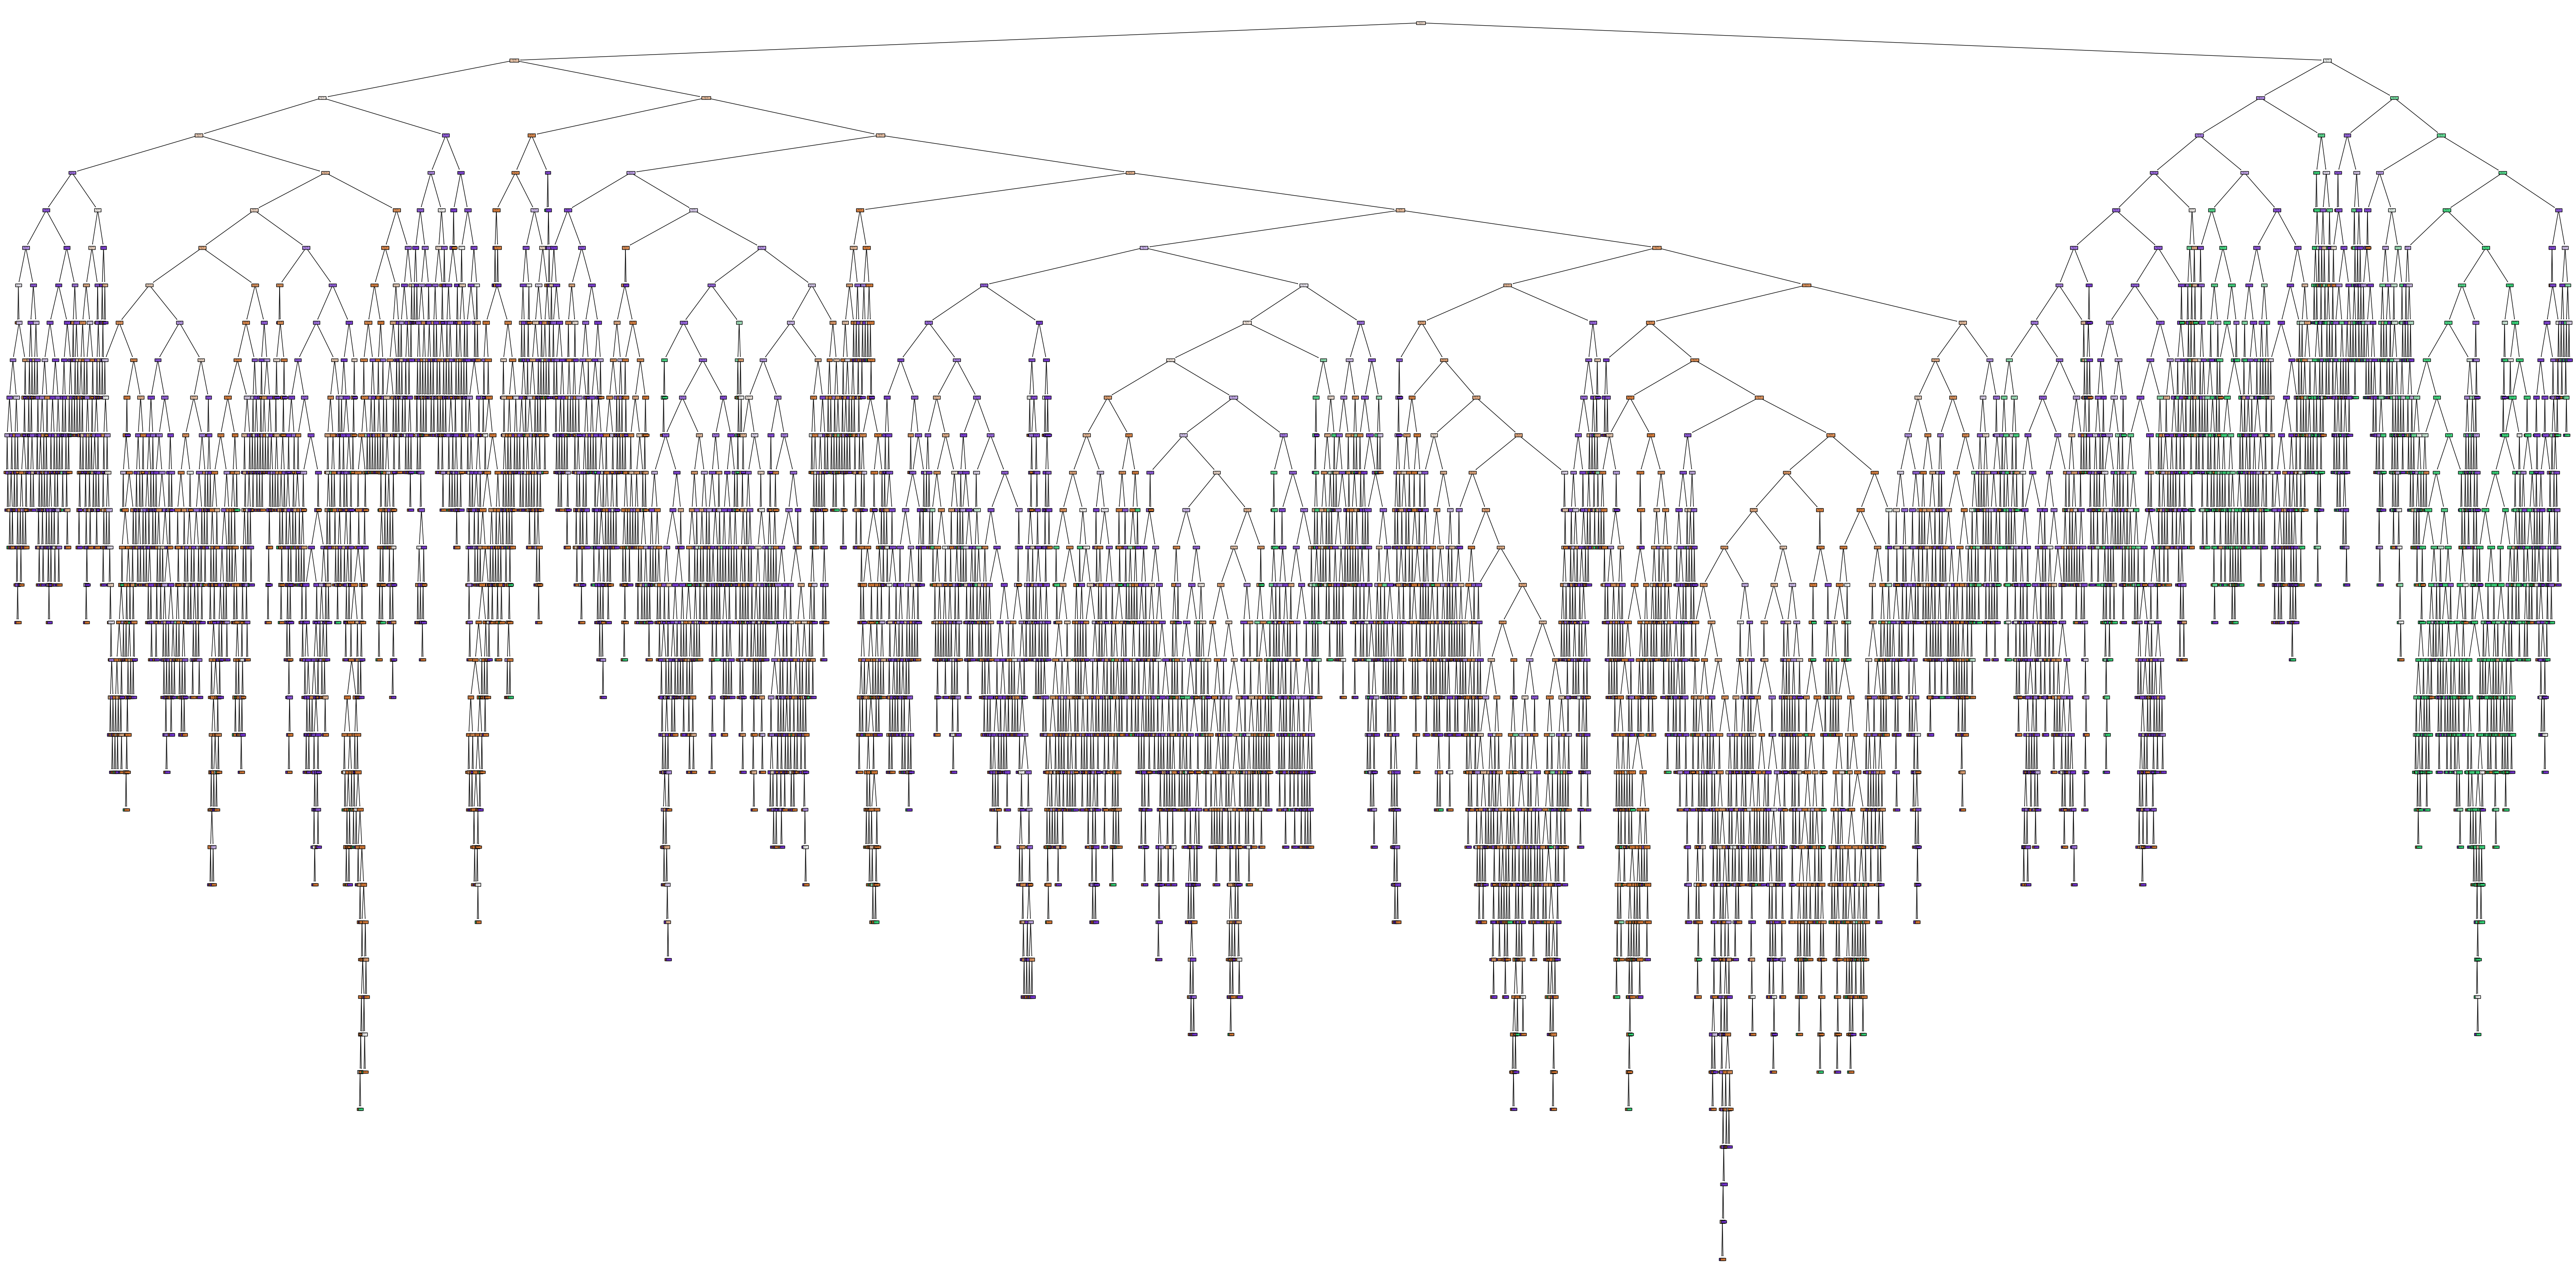

In [43]:
#Visualize the Decision Tree
from sklearn.tree import plot_tree
plt.figure(figsize=(80,40))
plot_tree(RF.estimators_[88], feature_names = list(X_train.columns), class_names=['0', '1', '2'],filled=True)

The optimal number of trees for the random forest algorithm is 90 trees.

The optimal depth for the random forest algorithm is 29


This is because from the Naïve Bayes algorithm it can be seen that the accuracy of the algorithm is 62.49% while for the random forest algorithm it is 95%. The Random forest algorithm is much more better than the Naïve Bayes algorithm.

The output of the Decision Tree above is overfitted.